In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv(r'D:\Customer CHurn\WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Exploration

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning

In [49]:
df = df.drop(columns=['customerID'])

In [50]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [52]:
df.groupby('SeniorCitizen').count()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,,,,,,,,,,,,,,,,,,,
0,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5890,5901
1,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142


In [53]:
df['Contract'] = df['Contract'].replace('Month-to-month', 'Monthly')

In [54]:
df['Contract'].value_counts()

Contract
Monthly     3875
Two year    1695
One year    1473
Name: count, dtype: int64

In [55]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Monthly,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Mailed check,74.40,306.60,Yes


In [56]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)','', regex=False)
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check    2365
Mailed check        1612
Bank transfer       1544
Credit card         1522
Name: count, dtype: int64

In [137]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})


C:\Users\vinay\AppData\Local\Temp\ipykernel_12608\4150411446.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})


## EDA

C:\Users\vinay\AppData\Local\Temp\ipykernel_12608\1245268545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


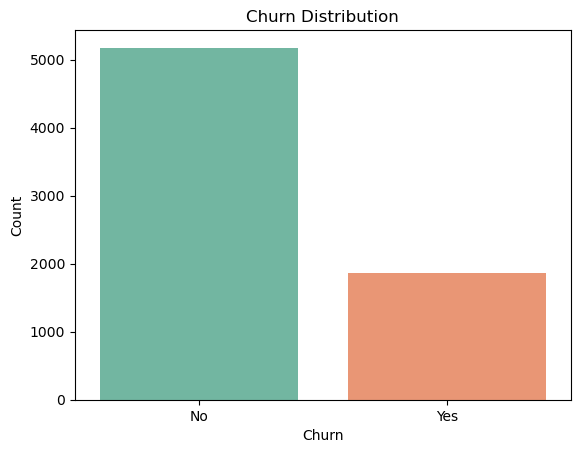

In [60]:
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_12608\2201521689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')


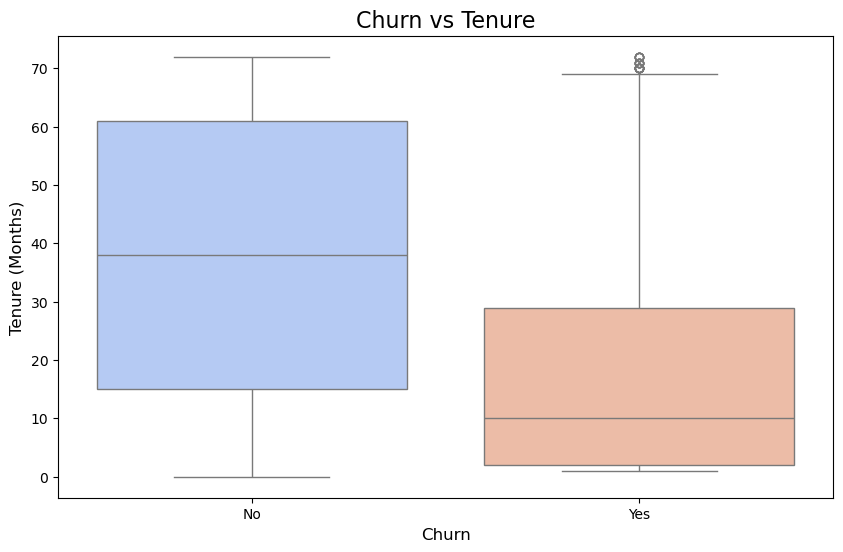

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Churn vs Tenure', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.show()

In [74]:
churn_rate = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate['Churn Rate'] = churn_rate['Yes']  # Get churn rate ('Yes' percentage)

In [76]:
churn_rate

Churn,No,Yes,Churn Rate
PaymentMethod,,,
Bank transfer,0.832902,0.167098,0.167098
Credit card,0.847569,0.152431,0.152431
Electronic check,0.547146,0.452854,0.452854
Mailed check,0.808933,0.191067,0.191067


C:\Users\vinay\AppData\Local\Temp\ipykernel_12608\2829416942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y='Churn Rate', data=churn_rate, palette='Set1')


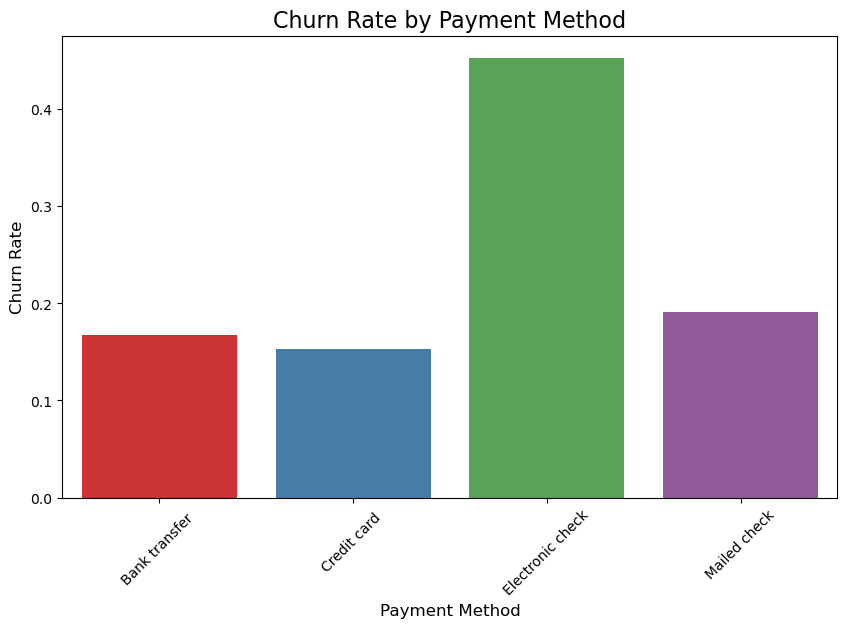

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x=churn_rate.index, y='Churn Rate', data=churn_rate, palette='Set1')
plt.title('Churn Rate by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [98]:
df_churn = df.query('Churn == "Yes"')
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Monthly,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Monthly,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Monthly,Yes,Bank transfer,103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Monthly,Yes,Bank transfer,44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Monthly,Yes,Credit card,102.95,6886.25,Yes


In [103]:
df_churn_no = df.query('Churn == "No"')
df_churn_no

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Monthly,Yes,Credit card,89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Monthly,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer,21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Monthly,Yes,Electronic check,29.60,346.45,No


In [111]:
payment_type = df_churn['PaymentMethod'].value_counts().reset_index().sort_values(ascending=True, by='count')
payment_type

,PaymentMethod,count
3,Credit card,232
2,Bank transfer,258
1,Mailed check,308
0,Electronic check,1071


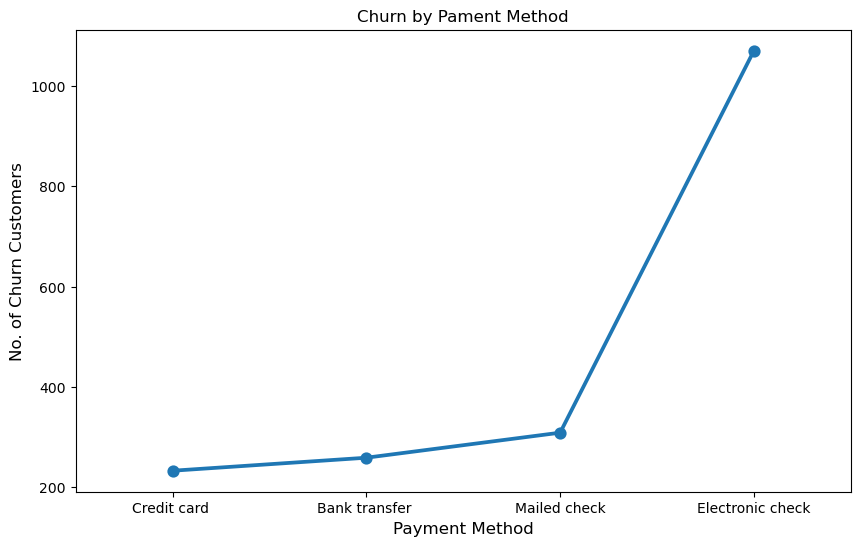

In [120]:
plt.figure(figsize=(10,6))
sns.pointplot(data=payment_type,x='PaymentMethod', y='count')
plt.title('Churn by Pament Method')
plt.xlabel('Payment Method', fontsize = 12)
plt.ylabel('No. of Churn Customers', fontsize = 12)
plt.show()

In [117]:
payment_type_ok = df_churn_no['PaymentMethod'].value_counts().reset_index().sort_values(ascending=True, by='count')
payment_type_ok

,PaymentMethod,count
3,Bank transfer,1286
2,Credit card,1290
1,Electronic check,1294
0,Mailed check,1304


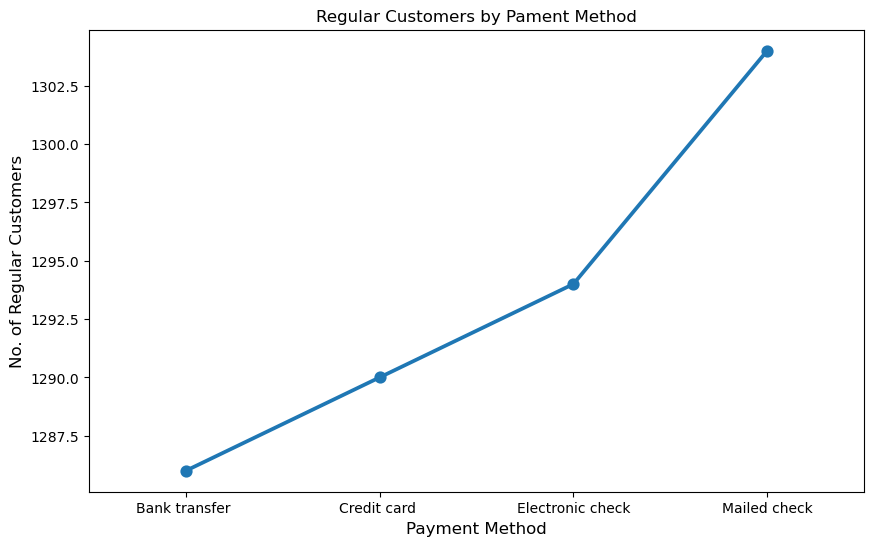

In [130]:
plt.figure(figsize=(10,6))
sns.pointplot(data=payment_type_ok,x='PaymentMethod', y='count')
plt.title('Regular Customers by Pament Method')
plt.xlabel('Payment Method', fontsize = 12)
plt.ylabel('No. of Regular Customers', fontsize = 12)
plt.show()

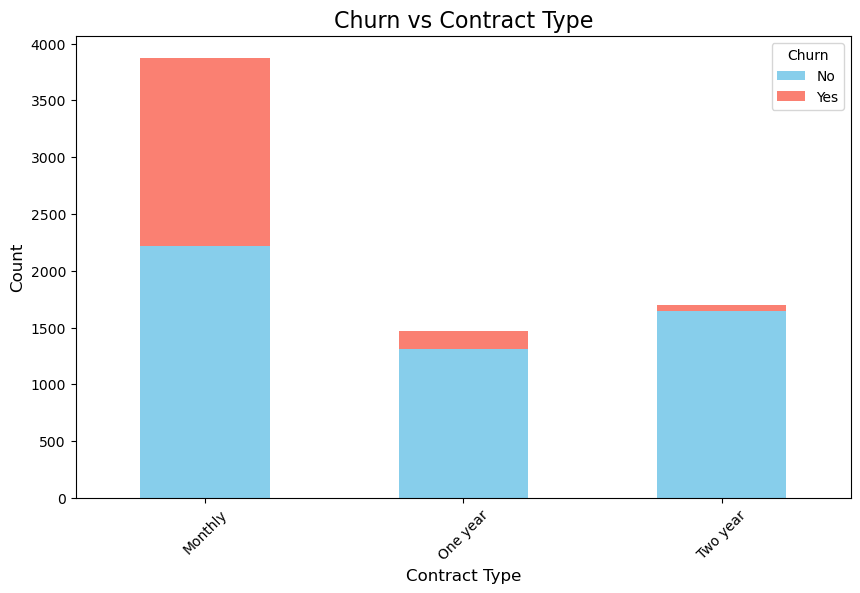

In [131]:
# Churn vs Contract Type (stacked barplot)
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Churn vs Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [145]:
df.to_csv('D:\Customer CHurn\Cleaned.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\vinay\AppData\Local\Temp\ipykernel_12608\1392330519.py:1: SyntaxWarning: invalid escape sequence '\C'
  df.to_csv('D:\Customer CHurn\Cleaned.csv', index=False)
